In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
festivales_bcn_17 = pd.read_pickle("./data/festivales_bcn_17_procesado.pkl")

In [71]:
categoricas_festivales = [
    "Ambit",
    "Titularidad",
    "NomDelFestival",
    "Mes",
    "Estacion",
    "Entrada"
]

In [72]:
categoricas_destacadas = [
    'Ambit', 
    'Titularidad', 
    'Mes', 
    'Estacion',
    "Entrada"
]

In [73]:
columnas_numericas_fests = [
    "Edicio",
    "Asistentes"
]

Funciones análisis

In [74]:
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    # Filtra solo las columnas que están en categoricas_destacadas
    columnas_categoricas = [col for col in columnas_categoricas if col in categoricas_destacadas]
    
    num_columnas = 2 
    num_filas = (len(columnas_categoricas) + num_columnas - 1) // num_columnas  # Calcula el número de filas necesario

    fig, axes = plt.subplots(num_filas, num_columnas, figsize=(15, 5 * num_filas))  # Ajusta el tamaño del subplot
    axes = axes.flatten()  # Aplanar el array de axes para un manejo más fácil

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if isinstance(df[col].iloc[0], list):  # Verificar si el elemento es una lista
            temp_df = df.explode(col)
        else:
            temp_df = df

        serie = temp_df[col].value_counts()
        if relativa:
            total = serie.sum()
            serie = serie.apply(lambda x: x / total)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            ax.set_ylabel('Frecuencia')

        # Usar la paleta 'viridis' y asignar 'x' a 'hue'
        sns.barplot(x=serie.index, y=serie, hue=serie.index, ax=ax, palette='viridis', legend=False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, len(axes)):
        axes[j].axis('off')  # Ocultar ejes no utilizados

    plt.tight_layout()
    plt.show()

In [75]:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [76]:
def plot_boxplot_grouped(df, column_to_plot, group_column):
    if df[column_to_plot].dtype in ['int64', 'float64'] and df[group_column].dtype in ['object', 'category']:
        sns.boxplot(data=df, x=group_column, y=column_to_plot)
        plt.show()

In [77]:
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

In [78]:
def variabilidad(df):
    df_var = df.describe().loc[["std", "mean"]].T
    df_var["CV"] = df_var["std"]/ df_var["mean"]
    return df_var

In [79]:
def plot_histo_den(df, columns):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [80]:
def plot_combined_graphs(df, columns, whisker_width=1.5):
    num_cols = len(columns)
    if num_cols:
        
        fig, axes = plt.subplots(num_cols, 2, figsize=(12, 5 * num_cols))
        print(axes.shape)

        for i, column in enumerate(columns):
            if df[column].dtype in ['int64', 'float64']:
                # Histograma y KDE
                sns.histplot(df[column], kde=True, ax=axes[i,0] if num_cols > 1 else axes[0])
                if num_cols > 1:
                    axes[i,0].set_title(f'Histograma y KDE de {column}')
                else:
                    axes[0].set_title(f'Histograma y KDE de {column}')

                # Boxplot
                sns.boxplot(x=df[column], ax=axes[i,1] if num_cols > 1 else axes[1], whis=whisker_width)
                if num_cols > 1:
                    axes[i,1].set_title(f'Boxplot de {column}')
                else:
                    axes[1].set_title(f'Boxplot de {column}')

        plt.tight_layout()
        plt.show()

Tendencia central

In [81]:
festivales_bcn_17.describe().loc["mean"]

Edicio           15.125000
Asistentes    39244.938776
Name: mean, dtype: float64

In [82]:
festivales_bcn_17.describe().loc["50%"]

Edicio           14.5
Asistentes    12320.0
Name: 50%, dtype: float64

In [83]:
festivales_bcn_17.describe().loc["max"]

Edicio            49.0
Asistentes    333523.0
Name: max, dtype: float64

In [84]:
festivales_bcn_17.describe().loc["min"]

Edicio           1.0
Asistentes    1656.0
Name: min, dtype: float64

In [85]:
festivales_bcn_17[categoricas_destacadas].mode().T

,0
Ambit,Música
Titularidad,Privada
Mes,Junio
Estacion,Primavera
Entrada,De Pago


Comentarios <br>
Com una mediana de unos 12 mil asistentes, casi idéntico al año anterior, el festival tipo de Barcelona es de música y con entrada pagada, con mayor predominancia en primavera, especialmente en junio.

Frecuencias relativa y absoluta

In [86]:
for catego in categoricas_destacadas:
    print(festivales_bcn_17[catego].value_counts())
    print("\n")

Ambit
Música                         17
Audiovisuals                   14
Arts visuals                    5
Multidisciplinaris i altres     5
Lletres                         4
Arts escèniques                 4
Name: count, dtype: int64


Titularidad
Privada    38
Pública     9
Mixta       2
Name: count, dtype: int64


Mes
Junio         9
Noviembre     7
Mayo          6
Enero         6
Julio         5
Octubre       4
Marzo         4
Septiembre    3
Febrero       2
Abril         2
Agosto        1
Name: count, dtype: int64


Estacion
Primavera    15
Otoño        13
Invierno     11
Verano       10
Name: count, dtype: int64


Entrada
De Pago    35
Gratis     10
Mixta       4
Name: count, dtype: int64




In [88]:
for catego in categoricas_destacadas:
    print(festivales_bcn_17[catego].value_counts()/len(festivales_bcn_17)*100)
    print("\n")

Ambit
Música                         34.693878
Audiovisuals                   28.571429
Arts visuals                   10.204082
Multidisciplinaris i altres    10.204082
Lletres                         8.163265
Arts escèniques                 8.163265
Name: count, dtype: float64


Titularidad
Privada    77.551020
Pública    18.367347
Mixta       4.081633
Name: count, dtype: float64


Mes
Junio         18.367347
Noviembre     14.285714
Mayo          12.244898
Enero         12.244898
Julio         10.204082
Octubre        8.163265
Marzo          8.163265
Septiembre     6.122449
Febrero        4.081633
Abril          4.081633
Agosto         2.040816
Name: count, dtype: float64


Estacion
Primavera    30.612245
Otoño        26.530612
Invierno     22.448980
Verano       20.408163
Name: count, dtype: float64


Entrada
De Pago    71.428571
Gratis     20.408163
Mixta       8.163265
Name: count, dtype: float64




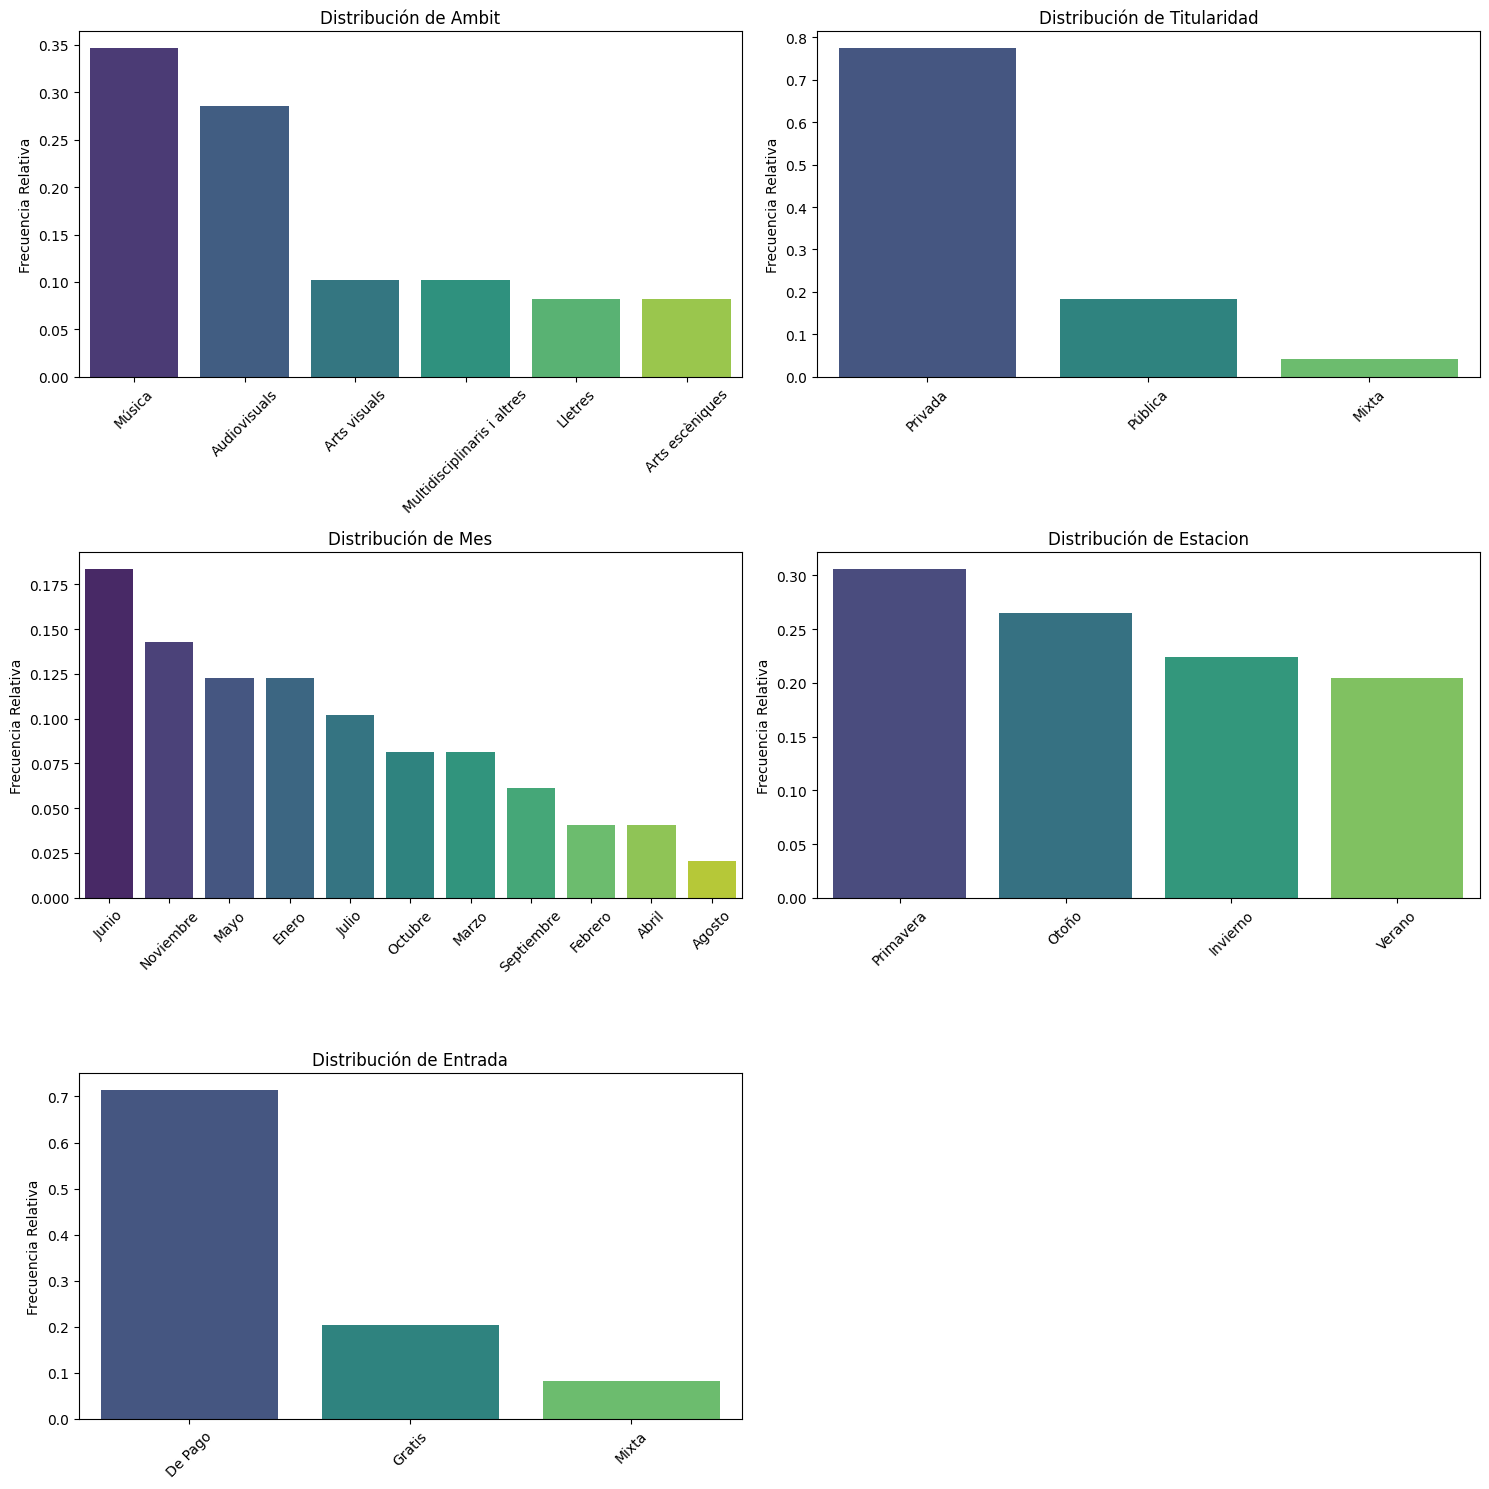

In [103]:
pinta_distribucion_categoricas(festivales_bcn_17, categoricas_destacadas, relativa = True)

Comentarios <br>
El número de propuestas del sector privado casi triplica las del sector público, lo cual es algo menos marcado que el año anterior, 2016. Y la proporción de festivales gratuitos vs. de pago es de algo más del doble.<br>
Es el último año en que vemos festivales programados todos los meses, y predomina la programación en primavera. Este año no hay nada en diciembre.<br>
La música es sin duda la protagonista de los festivales, seguida de lejos por los audivisuales.
Estas conclusiones parecen repetirse en la mayoría de los años, excepto en la pandemia y justo después

Medidas de posición

In [89]:
festivales_bcn_17.describe()

,Edicio,Asistentes
count,48.000000,49.000000
mean,15.125000,39244.938776
std,10.088175,64427.409483
min,1.000000,1656.000000
25%,7.000000,6175.000000
50%,14.500000,12320.000000
75%,22.000000,44251.000000
max,49.000000,333523.000000


In [90]:
get_IQR(festivales_bcn_17,"Edicio") 
# No es tanto mayor que la mediana (11), y casi igual que la media (mean)

15.0

In [91]:
print(festivales_bcn_17["Edicio"].quantile(0.5), "\n",
    festivales_bcn_17["Edicio"].quantile(0.9), "\n",
    festivales_bcn_17["Edicio"].quantile(0.95), "\n",
    festivales_bcn_17["Edicio"].max())

14.5 
 25.60000000000001 
 29.299999999999997 
 49.0


In [92]:
get_IQR(festivales_bcn_17,"Asistentes") 
# Sí es mucho mayor que la mediana(2120). Hay mucha dispersión. Hay que tomar con cuidado la tendencia central

38076.0

In [93]:
print(festivales_bcn_17["Asistentes"].quantile(0.5), "\n",
    festivales_bcn_17["Asistentes"].quantile(0.9), "\n",
    festivales_bcn_17["Asistentes"].quantile(0.95), "\n",
    festivales_bcn_17["Asistentes"].max())

12320.0 
 124751.20000000001 
 145528.59999999998 
 333523.0


Comentarios: <br>
Alta dispersión en el número de asistentes. La mediana está en 12.000, igual que el año anterior, lo que es unas 10 veces menos que el primer 90% en algo más de 120 mil, que crece ligeramente hascia el final, pero luego del 95 salta a más de 330 mil, lo que representa unas 2,3 veces más. Esta máxima es unas 27 veces la mediana. A excepción del 2019, a partir de ahora la máxima y el IQR suelen dar saltos de al menos el doble 

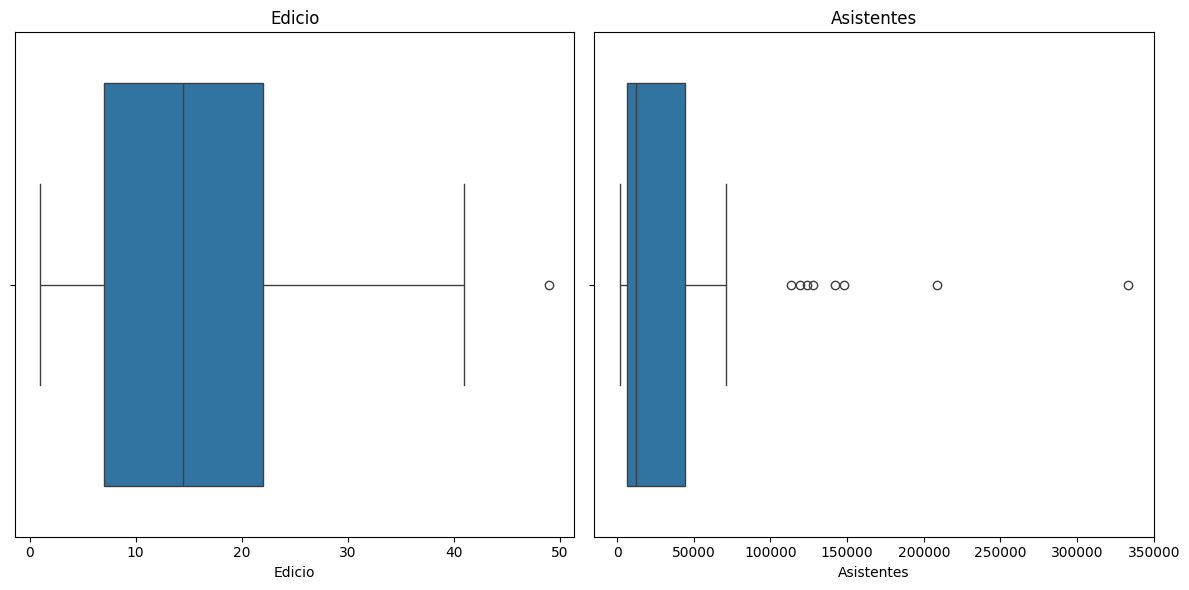

In [94]:
plot_multiple_boxplots(festivales_bcn_17, columnas_numericas_fests)

Comentarios: <br>
Gracias a los boxplots podemos observar como no hay una media centrada, y además hay bastantes outliers en las cifras de asistentes.

In [95]:
plot_boxplot_grouped(festivales_bcn_17, "Edicio", "Asistentes")

# Por qué no consigo que se imprima esto????

Medidas de dispersión

In [96]:
festivales_bcn_17.describe().loc[["std", "mean"]].T

,std,mean
Edicio,10.088175,15.125000
Asistentes,64427.409483,39244.938776


In [97]:
variabilidad(festivales_bcn_17)
# Menos 15% es baja variabilidad, entre 15 y 30 es normal, más de 30 es alta = Es decir, todos tienen una altísima variabilidad! A ver visualmente...

,std,mean,CV
Edicio,10.088175,15.125000,0.666987
Asistentes,64427.409483,39244.938776,1.641674


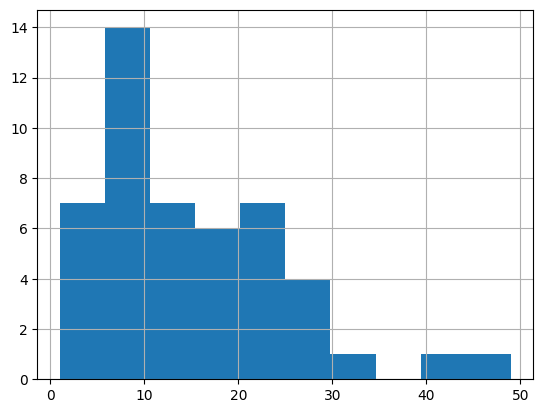

In [98]:
festivales_bcn_17["Edicio"].hist();

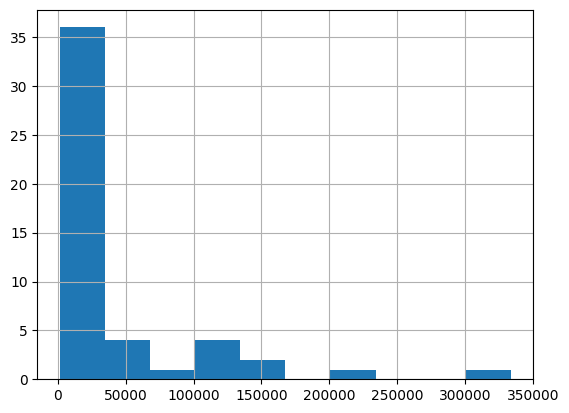

In [99]:
festivales_bcn_17["Asistentes"].hist();

Distribución

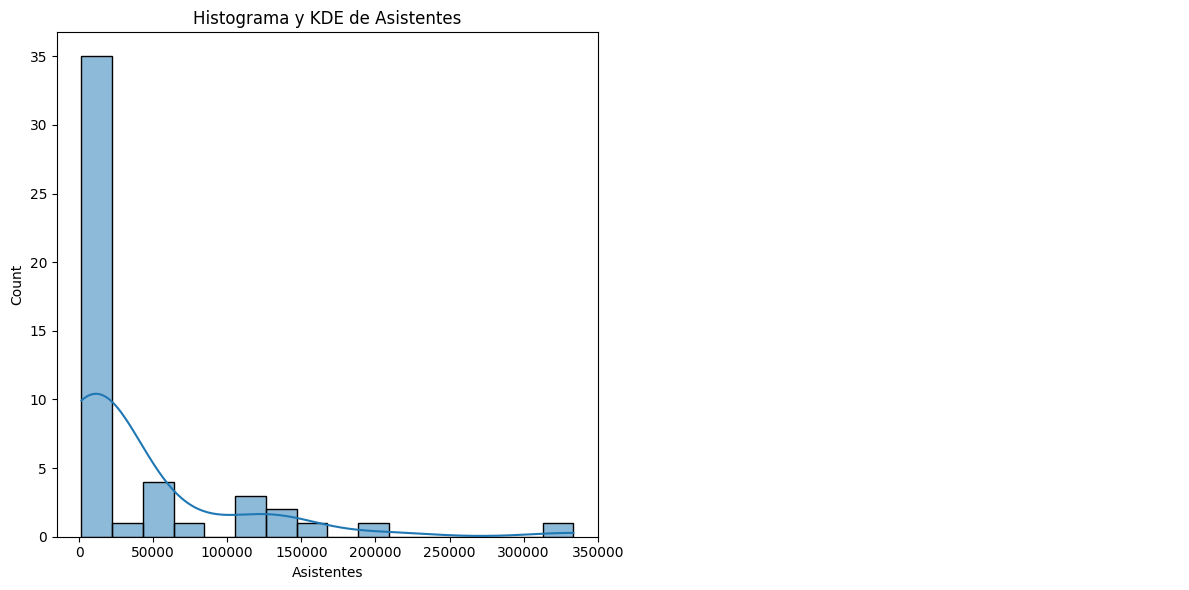

In [100]:
plot_histo_den(festivales_bcn_17, ["Asistentes"])

Anomalías outliers

(2,)


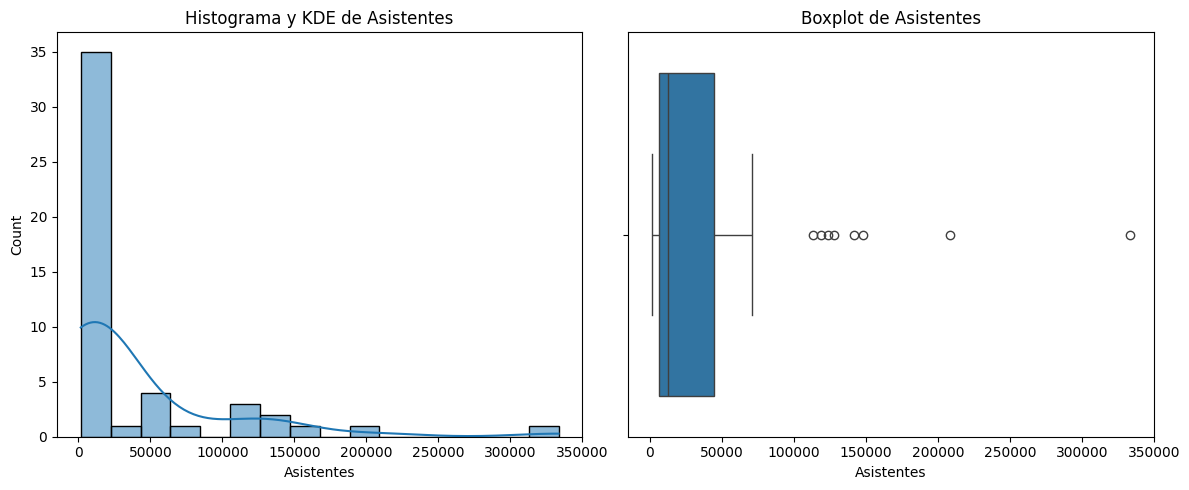

In [101]:
plot_combined_graphs(festivales_bcn_17, ["Asistentes"])

In [105]:
festivales_bcn_17 = festivales_bcn_17.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_17.head(10)  
tipo_entradas_top_festivales = primeros_10['Entrada'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

De Pago: 7 - 70.00%
Gratis: 2 - 20.00%
Mixta: 1 - 10.00%


In [106]:
festivales_bcn_17 = festivales_bcn_17.sort_values('Asistentes', ascending=False)
primeros_10 = festivales_bcn_17.head(10)  
tipo_entradas_top_festivales = primeros_10['Ambit'].value_counts()

porcentaje_tipo_entradas_primeros_10 = tipo_entradas_top_festivales / tipo_entradas_top_festivales.sum() * 100

for entrada, count in tipo_entradas_top_festivales.items():
    porcentaje = porcentaje_tipo_entradas_primeros_10[entrada]
    print(f"{entrada}: {count} - {porcentaje:.2f}%")

Música: 6 - 60.00%
Arts escèniques: 2 - 20.00%
Arts visuals: 2 - 20.00%


In [104]:
festivales_bcn_17

,Ambit,Edicio,NomDelFestival,Titularidad,Mes,Estacion,Asistentes,Entrada
38,Arts escèniques,8.0,Mercè Arts de Carrer. MAC,Pública,Septiembre,Otoño,333523.0,Gratis
44,Música,17.0,Primavera Sound,Privada,Mayo,Primavera,208400.0,De Pago
11,Música,6.0,Brunch-in the City,Privada,Marzo,Invierno,147881.0,De Pago
14,Arts visuals,5.0,DOCfield. Festival de Fotografia Documental,Privada,Octubre,Otoño,142000.0,De Pago
49,Música,49.0,Voll-Damm Festival de Jazz de Barcelona,Privada,Julio,Verano,127836.0,De Pago
47,Música,24.0,Sónar. Festival Internacional de Música Avança...,Privada,Junio,Primavera,123980.0,De Pago
34,Arts visuals,15.0,Loop Festival,Privada,Mayo,Primavera,119120.0,De Pago
29,Arts escèniques,41.0,Grec Festival de Barcelona,Pública,Julio,Verano,113541.0,Mixta
5,Música,25.0,BAM. Barcelona Acció Musical,Pública,Septiembre,Otoño,70990.0,Gratis
20,Música,8.0,Festival Cruïlla,Privada,Julio,Verano,57000.0,De Pago
